In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (7,4)
plt.style.use("seaborn-v0_8-whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Ionosphere.csv to Ionosphere.csv


In [3]:
df = pd.read_csv("Ionosphere.csv")
print(df.shape)
df.head()

(351, 35)


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [6]:

y = df['Target']
X = df.drop(columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (280, 35) | Test shape: (71, 35)


In [9]:
from sklearn.impute import SimpleImputer

print("Missing values before imputation:")
print(X_train.isnull().sum().sum())

perc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', Perceptron(max_iter=1000, random_state=42))
])

perc.fit(X_train, y_train)
y_pred_p = perc.predict(X_test)

print("Perceptron Results:")
print(classification_report(y_test, y_pred_p))

Missing values before imputation:
280
Perceptron Results:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.93      0.91      0.92        46

    accuracy                           0.90        71
   macro avg       0.89      0.90      0.89        71
weighted avg       0.90      0.90      0.90        71



In [12]:
from sklearn.impute import SimpleImputer

adaline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-3, random_state=42))
])

adaline.fit(X_train, y_train)
y_pred_a = adaline.predict(X_test)

print("Adaline (SGD log_loss) Results:")
print(classification_report(y_test, y_pred_a))

Adaline (SGD log_loss) Results:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        25
           1       0.88      0.80      0.84        46

    accuracy                           0.80        71
   macro avg       0.79      0.80      0.79        71
weighted avg       0.81      0.80      0.81        71



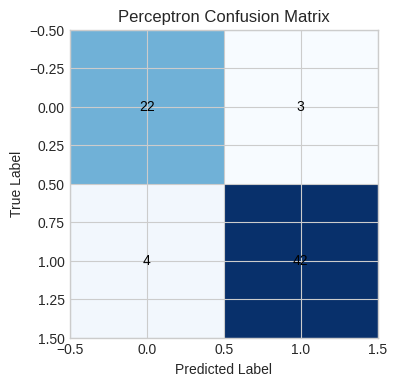

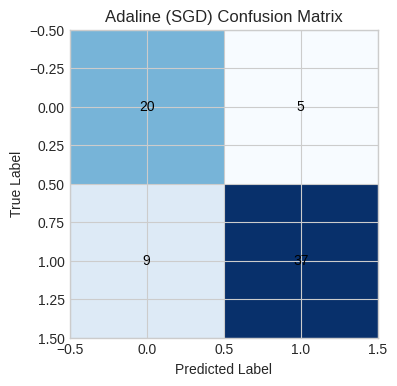

In [13]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    ax.imshow(cm, cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha='center', va='center', color='black')
    plt.show()

plot_confusion(y_test, y_pred_p, "Perceptron Confusion Matrix")
plot_confusion(y_test, y_pred_a, "Adaline (SGD) Confusion Matrix")


Applied Perceptron and Adaline models on the Ionosphere dataset for binary classification.